<a href="https://colab.research.google.com/github/jangsik-park/hello-world/blob/master/AI_03_%EB%B0%95%EC%9E%A5%EC%8B%9D_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚀 **Section1 Project**

### **목표 : 다음 분기에 어떤 게임을 만들어야 할까?**
- 추가 조건 설정
  - 회사는 급격한 성장이 목적이 아닌 안정적인 수익을 내고 싶다.
  

<br>

### **1. 전략 수립을 위해 반드시 분석해야 하는 내용**
- 연도별 게임의 트렌드

- 출고량이 높은 게임 분석하기

-    지역에 따른 선호 게임 장르


<br>

### **2.   추가로 알아 볼 내용**

- 히트작을 가장 많이 만든 회사는 어디일까?

<br>

### **3. 작업순서**

- 데이터 전처리
- 연도별 게임의 트렌드 알아보기
- 출고량이 높은 게임에 대한 분석 및 시각화 하기
- 지역에 따라서 선호하는 게임 장르가 다른지 알아보기
- 히트작을 가장 많이 만든 회사

### **4. 자료 파악**

- 게임의 장르는 총 **12가지**이다.
- Data는 **1980년 ~ 2020**년 까지의 자료가 존재한다.
- 총 31가지의 **Platform**이 존재한다.
- 중복을 제거하고 총 575개의 **회사** 가 있다.
라는 사실을 알 수 있습니다.


🕹️ Data Description

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

#### 📢  **데이터 전처리**

In [ ]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv',thousands=',', index_col=0)

In [ ]:
# data dimenstion 확인하기
print('자료의 shape : ', end='')
print(df.shape)
print()
print('자료의 dtype : ')
print(df.dtypes)

자료의 shape : (16598, 9)

자료의 dtype : 
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


In [ ]:
# 결측치 확인하기
df.isnull().sum()
# 중복된 행 찾아보기
df.duplicated().sum()
# year , 출고량 안의 value값 형태 확인하기

## 따라서 df['Year'].unique(), df['EU_Sales'].unique() 코드 실행했다.

1

In [ ]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Yumedia                            1
fonfun                             1
Simon & Schuster Interactive       1
Glams                              1
GOA                                1
Name: Publisher, Length: 578, dtype: int64

🔥 **자료 파악 결과**
- 게임의 장르는 총 **12가지**이다.
- Data는 **1980년 ~ 2020**년 까지의 자료가 존재한다.
- 총 31가지의 **Platform**이 존재한다.
- 중복을 제거하고 총 575개의 **회사** 가 있다.
라는 사실을 알 수 있습니다.

<br>
그리고 데이터에서 아래와 같은 문제점이 발견되었습니다. 

🔥   **문제점 발견**

- 결측치가 있는 행이 존재한다. (따라서 삭제해야 한다)
- Year의 형태가 제각각이다. ex) 80, 1
  - int로 형 변환
  - 변환 후 정확한 연도를 알 수 없는 데이터는 지우기
- 국가별 출고량의 type이 문자형이다
  - 출고량에 붙어 있는 단위, k와m을 처리해야 숫자형으로 바꿀 수가 있다.
  - K가 붙었으면 제거하고 숫자로 바꾼다음에 조건식을 이용해서 처리한다.
  - M이 붙었으면 문자만 제거한다.


In [ ]:
# 결측치 존재 행 삭제
df = df.dropna()
# Year를 정수로 바꿔준다
df['Year'] = df['Year'].astype(int)

In [ ]:
# year형태 파악 
df['Year'].unique()

# 그 결과 0,9,97,11,15,3,96,6,8,1,5,4,10,98,7,16,86,14,95,2,13,12,94 값인 것을 알맞게 바꿔줘야 함을 알 수 있다.
# for문으로 한자리 숫자면 앞에 2000, 
# 두자리 숫자이고 21 보다 작으면 앞에 20
# 21 보다 큰 숫자이면 앞에 19 를 붙여서 쉽게 할 수 있을 것 같으나.. 노가다 시행

df.replace({'Year':0},{'Year':2000},inplace= True)
df.replace({'Year':9},{'Year':2009},inplace= True)
df.replace({'Year':97},{'Year':1997},inplace= True)
df.replace({'Year':11},{'Year':2011},inplace= True)
df.replace({'Year':15},{'Year':2015},inplace= True)
df.replace({'Year':3},{'Year':2003},inplace= True)
df.replace({'Year':96},{'Year':1996},inplace= True)
df.replace({'Year':6},{'Year':2006},inplace= True)
df.replace({'Year':8},{'Year':2008},inplace= True)
df.replace({'Year':1},{'Year':2001},inplace= True)
df.replace({'Year':5},{'Year':2005},inplace= True)
df.replace({'Year':4},{'Year':10},inplace= True)
df.replace({'Year':98},{'Year':1998},inplace= True)
df.replace({'Year':7},{'Year':2007},inplace= True)
df.replace({'Year':16},{'Year':2016},inplace= True)
df.replace({'Year':86},{'Year':1986},inplace= True)
df.replace({'Year':14},{'Year':2014},inplace= True)
df.replace({'Year':95},{'Year':1995},inplace= True)
df.replace({'Year':2},{'Year':2002},inplace= True)
df.replace({'Year':13},{'Year':2013},inplace= True)
df.replace({'Year':12},{'Year':2012},inplace= True)
df.replace({'Year':94},{'Year':1994},inplace= True)
df.replace({'Year':10},{'Year':2010},inplace= True)

In [ ]:
#df에서 M을 공백으로 바꿔주기
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')

df['EU_Sales'] = df['EU_Sales'].str.replace('M','')

df['JP_Sales'] = df['JP_Sales'].str.replace('M','')

df['Other_Sales'] = df['Other_Sales'].str.replace('M','')

In [ ]:
#df에서 K를 공백으로 바꿔주기
#이후 df에서 정수인 부분을 찾아서 소수로 바꿔줄 것이다.
df['NA_Sales'] = df['NA_Sales'].str.replace('K','')

df['EU_Sales'] = df['EU_Sales'].str.replace('K','')

df['JP_Sales'] = df['JP_Sales'].str.replace('K','')

df['Other_Sales'] = df['Other_Sales'].str.replace('K','')

# 특정 문자가 있는 행 조회하기
#df.loc[df['NA_Sales'].str.contains('K')]

In [ ]:
# 출고량을 숫자로 바꿔주기

df['NA_Sales'] = df['NA_Sales'].apply(pd.to_numeric)
df['EU_Sales'] = df['EU_Sales'].apply(pd.to_numeric)
df['JP_Sales'] = df['JP_Sales'].apply(pd.to_numeric)
df['Other_Sales'] = df['Other_Sales'].apply(pd.to_numeric)

In [ ]:
# 만약 sales 값을 10으로 나눈 나머지가 0이라면 0.001을 곱한다.
for j in range(5,9):
  for i in range(len(df)):
    if df.iloc[i,j ]%10 == 0:
      df.iloc[i,j] =  df.iloc[i,j]*0.001
  else:
    continue

In [ ]:
# k와 m을 지우고 알맞게 값들이 변환 되었는지 확인하기
o =df['Name']=='Warriors Orochi 3'
df[o]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
139,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,0.05,0.04,0.02
2052,Warriors Orochi 3,PS3,2011,Action,Ubisoft Annecy,0.00,0.04,0.57,0.01
6876,Warriors Orochi 3,PSV,2013,Action,Tecmo Koei,0.00,0.00,0.07,0.00
7036,Warriors Orochi 3,PSP,2012,Action,Ubisoft Annecy,0.00,0.00,0.11,0.00
7128,Warriors Orochi 3,XOne,2014,Action,Tecmo Koei,0.01,0.03,0.00,0.00
10174,Warriors Orochi 3,X360,2011,Action,Ubisoft Annecy,0.09,0.03,0.03,0.01


#### 📢 **연도별 게임의 트랜드 알아보기**

- 게임 트랜드를 알기 위해서는 각 년도별 **'어떤 장르'**의 게임이 많이 출시 되었는지를 알아보면 된다고 생각했다.
- 따라서 아래와 같은 과정으로 분석을 진행했다.

In [ ]:
# df에서 연도와 장르 컬럼만 따로 뽑아서 df1으로 만들기
df1 = df[['Year','Genre']]

# df1에서 Year를 기준으로 Cross tabulation 진행하여 df2에 저장
df2 = pd.crosstab(index=df1.Year, columns= df1.Genre)

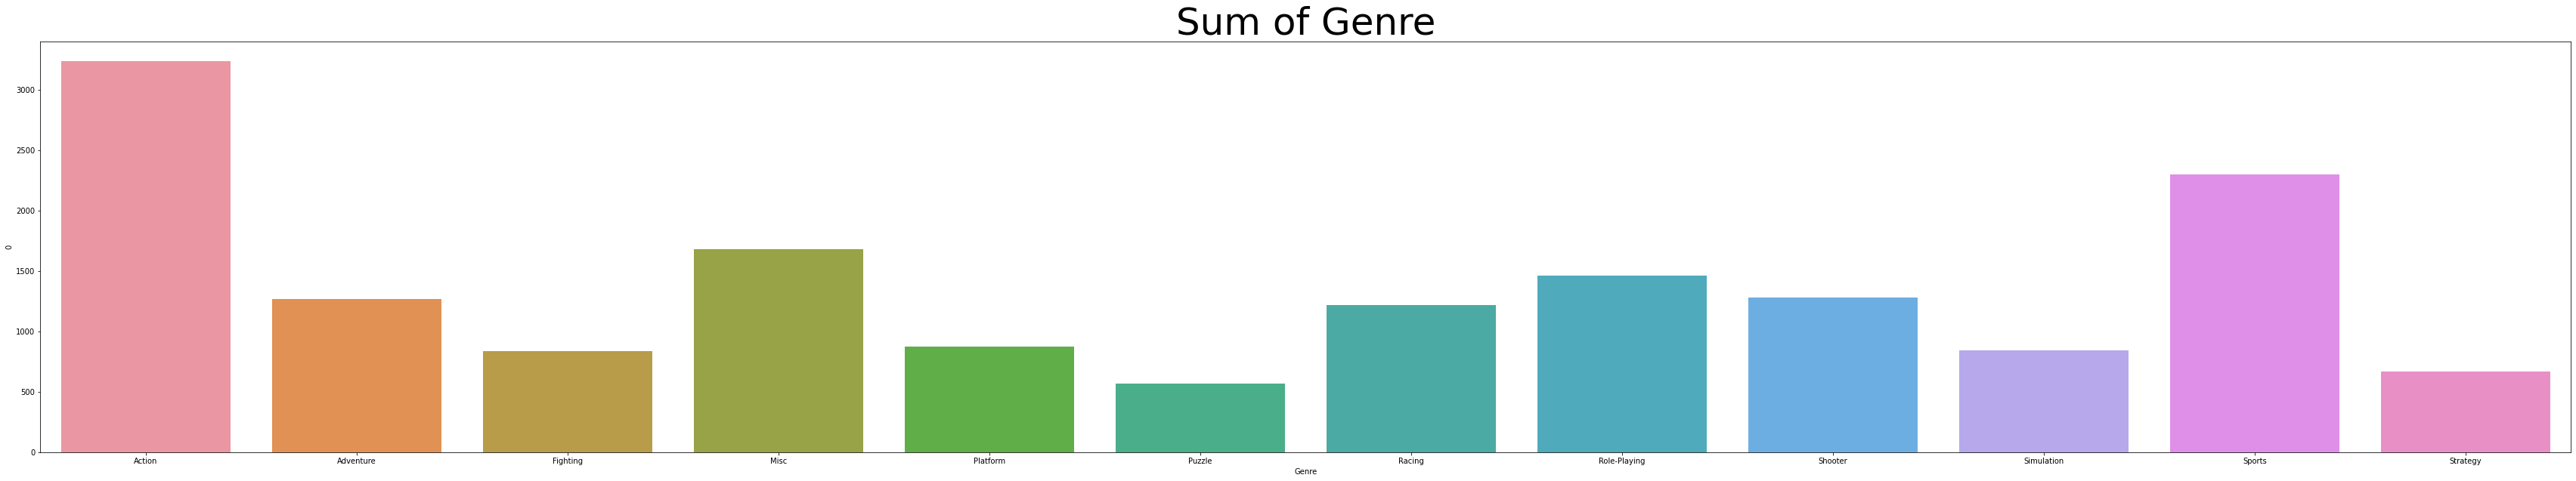

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1980 ~ 2020년까지 게임 장르별 합계
graph1 = pd.DataFrame(df2.sum())

# 장르 합계 시각화
sns.barplot(x=graph1.index, y=0, data=graph1)
plt.title('Sum of Genre', fontsize=50)
plt.rcParams['figure.figsize'] = [60, 10]
plt.show()

In [ ]:
# 년도별 출시된 게임 장르의 총 합계를 내림차순으로 정렬
graph1.sort_values(by= 0,ascending= False)

,0
Genre,
Action,3240
Sports,2299
Misc,1681
Role-Playing,1465
Shooter,1280
Adventure,1268
Racing,1219
Platform,873
Simulation,846


In [ ]:
# 각 년도별, 제일 많은 수를 차지하고 있는 장르와 그 값 구해서 df3에 저장
df3 = pd.concat([df2.idxmax(axis=1),df2.max(axis=1)],axis=1)
df3

,0,1
Year,,
1980,Misc,4
1981,Action,25
1982,Action,18
1983,Action,7
1984,Puzzle,3
1985,Platform,4
1986,Action,6
1987,Sports,4
1988,Platform,4


#####📌 **게임 장르에 대한 설명**

- 우선 게임의 장르는 총 12개이다. 이해를 돕기 위해 게임의 장르에 대해 정리 했다.

  - **Role-Playing** : RPG게임, 역할 연기 게임
  - **Action** : 일정한 스토리에 따라 실시간으로 캐릭터의 행동을 직접 조작하는 게임 ex) 스파이더맨_PS4
  - **Fighthing** : 두명 혹은 그 이상의 플레이어가 서로 '대결'을 하는 게임 ex) 철권_PS4 
  - **Adventure** : 주인공이 겪는 여러가지 모험을 게임으로 그려낸 게임
  - **Simulation** : 현실의 무언가를 비슷하게 따라하고 재현하는 게임 ex) 비행기 조작 OR 자동차 조작 게임
  - **Racing** : 경주에 초점이 맞춰져 있는 게임 ex) 자동차 경주 게임
  - **Sports** : 스포츠를 소재로 한 게임 ex) 피파2021_PS4
  - **Shooter** : 적의 공격을 피하며 무기를 쏘는 게임 ex) 콜오브듀티
  - **Misc** : 성별에 관계 없이 즐길 수 있는 게임 ex) 마리오카트
  - **Platform** : 플랫폼 게임이란 게임의 형식 또는 장르. 플랫포머나 점프 앤 런이라고도 한다. ex) 슈퍼마리오 
  - **Puzzel** : ex) 테트리스
  - **Startegy** : ex) 스타크래프트

##### 📌 **결과 정리**

- 위에서 1980년도 ~ 2020년까지 연도별 게임의 트랜드에 대해 알아 보았다.

<br>

- 80년대 초에는 **Action** 게임이 인기 있었다.
- 90년도 초반부터 중반까지 **격투게임**이 인기 있었음을 알 수 있다.
- 90년대 중반부터 2000년대 초반까지는 **Sports** 게임이 인기 있었음을 알 수 있다.
- 이후 2016년까지는 **Action** 게임이 가장 인기가 많았다.

- **마지막**으로 최근에는 **RPG게임**이나 **Simulation ex) 메이크업 아티스트** 게임이 상대적으로 많이 출시되고 있음을 알 수 있다
<br>

- 총 기간 동안 출시된 게임의 수는
  **액션이 3240개**로 지금까지 가장 많이 출시된 게임 장르이다.
- **Sports 는 2299개**로 두번째로 많이 출시된 게임 장르이다.
- **Puzzel**이 가장 적게 출시된 장르이다.  

   

📌 결과를 통한 아이디어 도출

- Action게임은 1980년대 이후로 가장 많이 출시된 게임 장르이다. 또한 가장 최근까지도 활발하게 출시되었었다. <br>
 - 따라서 게임업계에서 Action게임은 유저들에게 가장 **'호불호'**가 심하지 않으며, **수요가 많은** 장르라고 생각되어진다. 

⭐️ **결론** <br>
: 이와같은 이유로, 다음분기의 게임 장르로 **Action**을 만든다면 회사는 **안정적인 투자**를 할 수 있다.

#### 📢 **출고량이 높은 게임 알아보기**

In [ ]:
# df에 'Sales_Total' 열 만들어서 4개의 출고량 합으로 채우기

df['Sales_Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

# df에서 Name과 Platform, Genre, Sales_Total만 추출하기 = df4에 저장

df4 = df[['Name','Platform','Genre','Sales_Total']]
df4.head(10)

,Name,Platform,Genre,Sales_Total
1,Candace Kane's Candy Factory,DS,Action,0.04
2,The Munchables,Wii,Action,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,0.02
4,Deal or No Deal: Special Edition,DS,Misc,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,0.25
6,Power Pro Kun Pocket 8,DS,Sports,0.14
7,JASF: Jane's Advanced Strike Fighters,PC,Simulation,0.03
8,Samurai Warriors: State of War,PSP,Action,0.19
9,Imabikisou,PS3,Adventure,0.04
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,Action,0.08


                            Name Platform         Genre  Sales_Total
2909                  Wii Sports      Wii        Sports        82.74
4200           Super Mario Bros.      NES      Platform        40.24
12580             Mario Kart Wii      Wii        Racing        35.83
3353           Wii Sports Resort      Wii        Sports        33.00
7830    Pokemon Red/Pokemon Blue       GB  Role-Playing        31.38
1204                      Tetris       GB        Puzzle        30.26
6938       New Super Mario Bros.       DS      Platform        30.01
3015                    Wii Play      Wii          Misc        29.01
16532  New Super Mario Bros. Wii      Wii      Platform        28.61
10489                  Duck Hunt      NES       Shooter        28.31


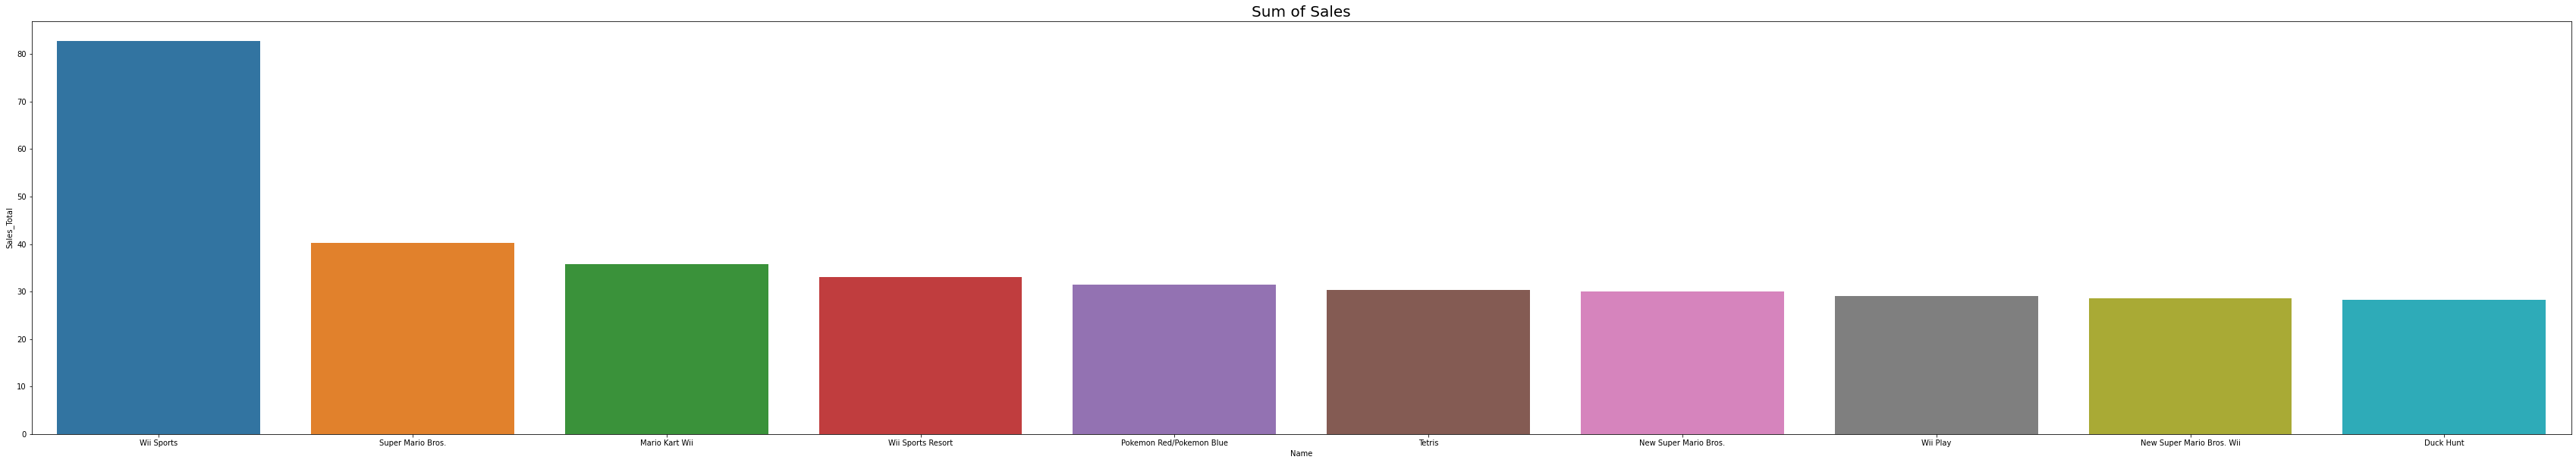

In [ ]:
# 출고량이 높은 Top 10 추출하기
graph2 = df4.sort_values(by='Sales_Total', ascending= False).head(10)
print(graph2)
# 출고량 Top10 항목 시각화
sns.barplot(x='Name', y='Sales_Total', data=graph2)
plt.title('Sum of Sales', fontsize=20)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [ ]:
k = (df['Name']=='Wii Sports')
df[k]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
ㅣ = (df['Name']=='Super Mario Bros.')
df[ㅣ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
13053,Super Mario Bros.,GB,1999,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


#### 📌 **알 수 있는 사실**

- wii sports가 82.74로 출고량이 가장 많다.
  - wii sports는 **장르** : Sports이며, **Platform**은 Wii 이다
  - 미국에서의 출고량이 가장 많다.
  - 2006년 판매 데이터이다.
<br>
- 두번째로 출고량이 많은 게임은 'Super Mario Bros' 로 40.24이다.
  - 이 역시 미국에서의 출고량이 가장 많다.
  - 장르는 Platform이다.
  - 1985년 기준이다.

<br>

- 판매량이 많은 Top10 개의 게임 중 10개 모두 **닌텐도와 관련된 Platform** 이다. (NES : 닌텐도 엔터테인먼트 시스템 // GB : 닌텐도 게임보이)

- 출고량이 높은 10개의 게임은 마리오나 포켓몬 처럼 익숙한 **캐릭터**가 등장한다. 

- Platrform이나 Sprots 게임처럼 **난이도가 어렵지 않은** 게임들임을 알 수 있다.

- 판매량이 많은 Top10 개의 게임 중 **2개의 장르가 Sports**, **3개의 장르가 Platform**이다

📌 **닌텐도 Wii**

- Wii Sports 같은 경우는 다음과 같은 특징이 있다. <br>
 - Wii 리모컨의 특징을 살리면서, 테니스, 야구, 골프, 볼링, 복싱의 총 다섯 종류의 게임이 포함되어 있다. 
 - 모두 실제에 가까운 움직임으로 플레이하며 또한 여러 명이서 대전 플레이가 가능하다.
 - 남녀노소 쉽고 재밌게 컨텐츠를 즐길 수 있다는 **장점이 있다.**

⭐️ **결론** <br>
: 이와같은 사실로, 다음분기의 게임을 만들 때 아래의 3가지 조건을 반영하는 것이 필요해 보인다.

- 게임의 플레이가 **쉬워야 한다** 
- 대중에게 익숙하고 친근한 이미지를 주는 **캐릭터**가 사용되어야 한다.
- 게임의 플랫폼을 제한해야 하는 상황이 온다면 **닌텐도** 와의 협업은 반드시 선택해야 한다.

#### 📢 **지역에 따른 게임 장르의 선호도 차이 알아보기** 

- 지역별 출고량 수를 통해 선호도를 비교할 수 있다고 생각한다.

In [ ]:
#장르와 Sales 데이터만 따로 뽑기 df5에 저장
df5 = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

#장르에 대해서 Groupby 하기
df5 = df5.groupby('Genre').sum()

# NA_Sales를 기준으로 내림차순 정리
df5.sort_values(by='NA_Sales', ascending= False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86
Platform,445.38,200.63,130.53,51.45
Misc,394.73,208.15,104.18,72.64
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Fighting,220.35,99.90,87.14,36.15
Simulation,181.43,112.99,63.54,31.32


In [ ]:
# EU 기준으로 내림차순 정렬
df5.sort_values(by='EU_Sales', ascending= False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86
Racing,354.70,235.02,56.32,76.51
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Role-Playing,318.76,183.09,342.93,56.73
Simulation,181.43,112.99,63.54,31.32
Fighting,220.35,99.90,87.14,36.15


In [ ]:
# JP 기준으로 내림차순 정렬
df5.sort_values(by='JP_Sales', ascending= False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Role-Playing,318.76,183.09,342.93,56.73
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Platform,445.38,200.63,130.53,51.45
Misc,394.73,208.15,104.18,72.64
Fighting,220.35,99.90,87.14,36.15
Simulation,181.43,112.99,63.54,31.32
Racing,354.70,235.02,56.32,76.51
Puzzle,121.58,50.47,56.24,12.44


In [ ]:
# Other_sales 기준으로 내림차순 정렬
df5.sort_values(by='Other_Sales', ascending= False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86
Racing,354.70,235.02,56.32,76.51
Misc,394.73,208.15,104.18,72.64
Role-Playing,318.76,183.09,342.93,56.73
Platform,445.38,200.63,130.53,51.45
Fighting,220.35,99.90,87.14,36.15
Simulation,181.43,112.99,63.54,31.32


In [ ]:
# 지역별 출고량 총합 구하기
df5.sum()

NA_Sales       4307.04
EU_Sales       2393.57
JP_Sales       1271.39
Other_Sales     783.37
dtype: float64

#### 📌 **알 수 있는 사실**
- 지역별로 선호하는 장르에 차이가 보인다.
- 어드밴처 , 전략 게임은 4개 지역 공통적으로 선호도가 **하위권**에 위치한다.
- 4개의 지역별 게임 선호 장르의 **공통점** 으로는 **Action과 Sports**가 1~3위 내에 위치한다는 점이다.
- **지역별 출고량 총합**은 미국이 가장 크고, 유럽, 일본, 그외 나라 순서이다.
- 일본은 **Role-playing 게임이 선호도 1위**라는 것이 눈에 띈다.
- 일본은 타지역들과 달리 **Shooting 게임이 최하위**에 위치하고 있다는 점도 눈여겨 볼만 하다.


##### 📌 **사실을 통한 아이디어 도출**

- 전략 게임 등 비교적 **난이도가 높은** 게임은 지리적 위치에 상관없이 공통적으로 선호도가 **낮을 것이다**

- Action 과 Sports는 지역에 관계 없이 **높은 선호도**를 보일 것이다.


- 일본은 총게임 처럼 **잔인한 게임**에 대한 선호도가 낮을 수 있음을 추측해 볼 수 있다.



⭐️ **결론** <br>
: 따라서, 다음분기의 게임을 만들 때 아래의 요소들을 고려하는 것이 필요하다고 생각.

- **Sports나 Action 게임**에 투자하는 것이 안전한 방향일 것이다. 
- 게임의 플레이 난이도가 **어렵지 않아야 한다**
- 게임의 출시 시기가 지역별로 차이가 나야하는 상황이라면 **미국에 먼저 출시** 하는 것이 좋다.
  - 시장이 크기 때문에, 마케팅 속도가 빠를 것이라고 생각되기 때문이다.

### 📢 **히트작을 가장 많이 만든 회사**

In [ ]:
# 출고량이 많은 Top20 회사
Many_make = df[['Publisher','Sales_Total']]
Many_make.sort_values(by='Sales_Total',ascending=False).head(20)


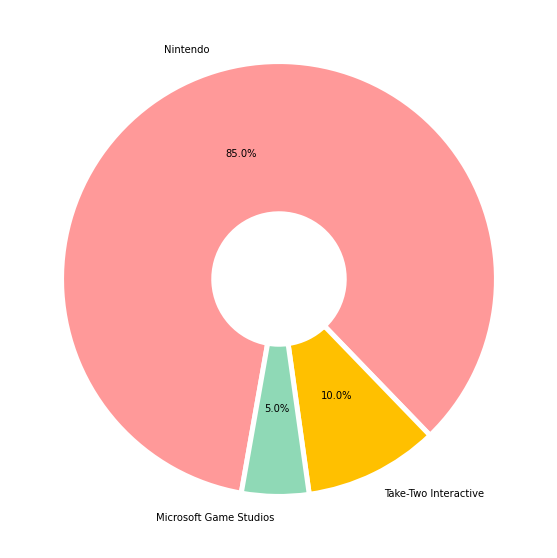

In [ ]:
import matplotlib.pyplot as plt

ratio = [17,2,1]
labels = ['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios']
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### 📌 **알 수 있는 사실**

- 역대 비디오게임 Top20 출고량을 조사해 봤을 때 **닌텐도 회사**가 85%를 차지한다. 

- **따라서** 닌텐도의 경쟁력이 강하다는 것을 알 수 있다.

#### 📢 **최종 결론**

앞에서 진행한 4가지 주제에 대한 분석 결과를 정리하면 다음과 같다.

- 연도별 게임 장르의 트랜드 분석을 통해서 **Action 장르**가 가장 오랫동안 인기가 있었으며, 최근까지도 그 수요가 높았음을 알 수 있다.

- 전체 지역을 대상으로 출고량이 높은 게임을 분석한 결과
  - **플레이가 쉽고**, <br>
    **친숙한 게임 캐릭터**를 사용하는 것이 게임의 인기와 연관됨을 알 수 있다.
  - 또한 **닌텐도가 Platform으로써 영향력이 크다**는 것을 알 수 있다.

- 지역별로 선호하는 게임 장르를 분석한 결과
  - 지역 공통적으로 **Sports나 Action** 게임이 선호도가 높음을 알 수 있다.
  - 전략게임처럼 **난이도가 높은 게임은** 전체적으로 선호도가 낮음을 알 수 있다.
  - 미국의 Viedo Game 시장이 **세계적으로 가장 크다**는 것을 알 수 있다.


##**따라서**

다음분기 게임 제작을 통해 회사가 안정적인 수익을 창출하려면, <br>

>>
게임의 장르는 **Action** <br>
최우선적으로 고려해야 할 출시 지역은 **북미** <br>
게임의 난이도는 **쉽고, 누구나 즐길수 있도록** <br>
최우선 협력사는 **닌텐도** <br>
캐릭터는 **유저에게 친숙하도록** <br>
>>



만들어야 한다고 생각한다.





## **아쉬운점 및 느낀점**

**코딩 :** 전처리 과정에서 for문을 사용하면 더 편할 것 같은데, 이번 기회에는 구현하지 못한 것이 아쉽다.
<br>
<br>
**분석 :** 1980년대 부터 쌓아 온 데이터를 기반으로 분석을 했다. **하지만** 시대가 빠르게 변화하고, 메타버스 등 새로운 기술이 대두되고 있는 현실에서 과거의 자료를 가지고 한 분석만으로 새로운 서비스를 기획하는 것은 한계가 분명히 있음을 느꼈다.
<br>
<br>
어떤 요소를  추가적으로 더 고려하는 것이 좋을까?에 대한 깊은 고민이 필요할 것 같다. 